## Homework 3

### Question 1 (10 points)
Create a class called ImageAugmentor which needs to have the following methods
1. rotate() which takes an image and an angle in radians and returns the rotated image.
2. translate() which takes an image and a translation in pixels and returns the translated image. Assume that the translation along x- and y-axis are same.
3. noise() which takes an image, the mean and variance of a Gaussian and applies Gaussian noise returns the noisy image.
4. transform() which takes an image and applies random rotation less than 10 degrees, random translation between -10 and 10 pixels, random Gaussian noise with a mean of 0 and variance between 0 and 0.02 and return the final image. The transform() method will use methods in #1 to #3 for performing the various operations. You do not need to call methods in #1 to #3 directly.

You need to test your code using the 'dog.png' image supplied in your notes.  
Finally view the output image. Use the test code below for testing your class.

img = cv2.imread("dog.png")  
aug = ImageAugmentor()  
img1 = aug.transform(img)  
print(img1.shape)  
plt.imshow(img1)  
plt.show()

In [1]:
!pip install opencv-contrib-python

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
from skimage.transform import rotate
from skimage.util import random_noise

In [4]:
class ImageAugmentor:
    #def __init__(self, image):
    #    self.image = image
        
    '''
    1. rotate() which takes an image and an angle in radians and returns the rotated image.
    '''
    def rotate(self, image, angle_radians):
        rotated_image = rotate(image, angle = (angle_radians * 180)/np.pi)
        plt.imshow(rotated_image)
        plt.show()
        return rotated_image
    

    ''' 
    2. translate() which takes an image and a translation in pixels and returns the translated image.
    Assume that the translation along x- and y-axis are same. 
    '''
    def translate(self, image, x_length, y_length):
        M = np.float32([[1, 0, x_length], [0, 1, y_length]])
        (rows, cols) = image.shape[:2]
        translated_image = cv2.warpAffine(image, M, (cols, rows)) 
        plt.imshow(translated_image)
        plt.show()
        return translated_image
    
    
    '''
    3. noise() which takes an image, the mean and variance of a Gaussian and applies Gaussian noise 
    returns the noisy image.
    '''
    def noise(self, image, m, v):
        noisy_image = random_noise(image, mode='gaussian', mean = m, var = v)
        noisy_image = np.array(255 * noisy_image, dtype = 'uint8')
        plt.imshow(noisy_image)
        plt.show()
        return noisy_image
        
        
    '''
    4. transform() which takes an image and applies random rotation less than 10 degrees,
       random translation between -10 and 10 pixels, random Gaussian noise with a mean of 0
       and variance between 0 and 0.02 and return the final image. The transform() method will
       use methods in #1 to #3 for performing the various operations. You do not need to call methods
       in #1 to #3 directly.
    '''
    def transform(self, image):
        print("Rotated")
        degrees = (np.random.uniform(low = 0, high = 10) * np.pi) / 180
        transformed_image = self.rotate(image, degrees)
        
        print("Rotated + Translated")
        x_pixels = np.random.randint(low = -10, high = 11)
        y_pixels = np.random.randint(low = -10, high = 11)
        transformed_image = self.translate(transformed_image, x_pixels, y_pixels)
        
        print("Rotated + Translated + Noisy")
        mean = 0
        variance = np.random.uniform(low = 0, high = 0.02)
        transformed_image = self.noise(transformed_image, mean, variance)
        
        return transformed_image   # Returns the image's data in a NumPy array

Rotated


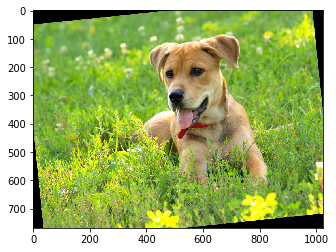

Rotated + Translated


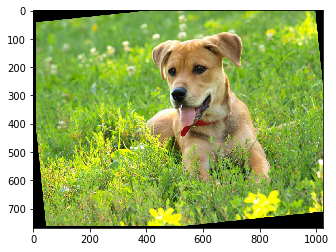

Rotated + Translated + Noisy


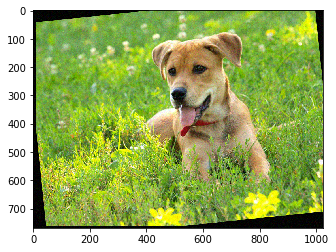

array([[[21,  0,  2],
        [ 2,  0, 15],
        [ 0,  0,  0],
        ...,
        [ 0, 11, 23],
        [ 0,  3,  0],
        [ 0,  1, 13]],

       [[ 0,  4,  0],
        [ 8, 12,  4],
        [ 0,  1,  0],
        ...,
        [ 0,  6,  5],
        [ 6,  1,  0],
        [ 2,  9,  0]],

       [[ 0,  5,  0],
        [ 0,  0, 15],
        [ 0,  1,  0],
        ...,
        [ 2,  0, 16],
        [ 0, 10,  0],
        [ 0,  9,  0]],

       ...,

       [[ 6,  2,  0],
        [ 2,  0,  0],
        [ 1,  0,  0],
        ...,
        [20,  0,  8],
        [ 0,  0,  0],
        [12,  8,  2]],

       [[ 0,  0,  0],
        [ 7,  0,  0],
        [ 0, 10,  0],
        ...,
        [ 0,  0, 11],
        [ 4,  0, 13],
        [ 0,  0,  1]],

       [[18,  6,  0],
        [ 0, 11,  4],
        [ 0,  3,  9],
        ...,
        [ 0,  8,  0],
        [ 0,  0,  1],
        [ 6, 19,  3]]], dtype=uint8)

In [5]:
img = imageio.imread("dog.png")   # Using this instead of 'img = cv2.imread("dog.png")' for better color quality
image_class = ImageAugmentor()
image_class.transform(img)

Rotated


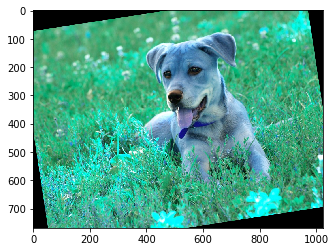

Rotated + Translated


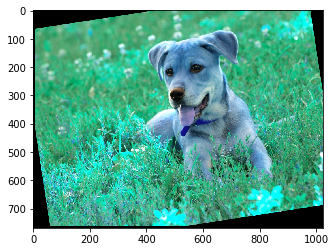

Rotated + Translated + Noisy


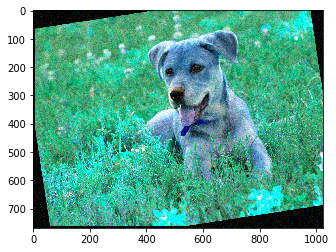

(768, 1024, 3)


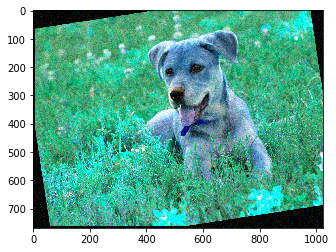

In [7]:
### Test Code from the instructions ###

img = cv2.imread("dog.png")   # Color quality not as good compared to 'img = imageio.imread("dog.png")' above
aug = ImageAugmentor()
img1 = aug.transform(img)
print(img1.shape)
plt.imshow(img1)
plt.show()